# **Innomatics Data Science Internship |  Entrance Test (Part 2 of 2) | Hackathon**

Assume that you started working with Netfiz as a Junior Data Scientist. For your company, providing better movie recommendations is at its core and, helps improve better user experience and generate more revenue.

####Understand that:

Recommender systems make movie-watching a personalized adventure, delighting users with tailored suggestions based on their tastes.
By predicting user preferences, these systems keep users engaged, driving increased interaction with your platform.
A robust movie recommender system translates to business success. Satisfied users are loyal users, contributing to increased user retention and revenue.
Imagine the excitement of helping users discover their next favorite movie! Later during the internship program, we will ask you to create a cutting-edge movie recommendation system based on a treasure trove of user ratings.


####About Dataset:
Dive into a dataset brimming with 100,836 ratings across 9,742 movies, generated by 610 users over the years. These data were created by 610 users between March 29, 1996 and September 24, 2018. This dataset was generated on September 26, 2018. Each user is represented by an id, and no other information is provided about the user. The data are contained in the files `links.csv`, `movies.csv`, `ratings.csv`and `tags.csv`.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# loading csv files

links_df = pd.read_csv('/content/links.csv')
movies_df = pd.read_csv('/content/movies.csv')
ratings_df = pd.read_csv('/content/ratings.csv')
tags_df = pd.read_csv('/content/tags.csv')

## **Data Exploration**

In [ ]:
print(links_df.dtypes) #links
print(movies_df.dtypes) #movies
print(ratings_df.dtypes) #ratings
print(tags_df.dtypes) #tags

movieId      int64
imdbId       int64
tmdbId     float64
dtype: object
movieId     int64
title      object
genres     object
dtype: object
userId         int64
movieId        int64
rating       float64
timestamp      int64
dtype: object
userId        int64
movieId       int64
tag          object
timestamp     int64
dtype: object


In [ ]:
# What is the shape of "movies.csv"?

movies_df.shape

(9742, 3)

In [ ]:
# What is the shape of "ratings.csv"?

ratings_df.shape

(100836, 4)

In [ ]:
# How many unique "userId" are available in "ratings.csv"?


unique_userId = ratings_df['userId'].nunique()
print(f'The Unique UserId in ratings.csv is:- {unique_userId}')

The Unique UserId in ratings.csv is:- 610


In [ ]:
# Which movie has recieved maximum number of user ratings?
# for this question we have to join movies and ratings csv files means we have to merged it

merging_df= pd.merge(ratings_df, movies_df, on= 'movieId')
maximum_rating_movie = merging_df.groupby('title')['rating'].count().idxmax()
print(f'This Movie Recevied Maximum Numbers of Users Ratings:- {maximum_rating_movie}')

This Movie Recevied Maximum Numbers of Users Ratings:- Forrest Gump (1994)


In [ ]:
# Select all the correct tags submitted by users to "Matrix, The (1999)" movie?
# now for this question we need tags and movies csvs

Matrix_tags = tags_df[tags_df['movieId'].isin(movies_df[movies_df['title'] == 'Matrix, The (1999)']['movieId'])]['tag']
print(f'All Correct Tags Submitted By USers to "Matrix, The (1999)" Movies:- {", ".join(Matrix_tags)}')

All Correct Tags Submitted By USers to "Matrix, The (1999)" Movies:- martial arts, sci-fi, alternate universe, philosophy, post apocalyptic


In [ ]:
# What is the average user rating for movie named "Terminator 2: Judgment Day (1991)"?
# for this we needd ratings and movie datasets

Terminator2Judgment_Day1991_rating = ratings_df[ratings_df['movieId'].isin(movies_df[movies_df['title'] == 'Terminator 2: Judgment Day (1991)']['movieId'])]['rating']
average_user_ratings = Terminator2Judgment_Day1991_rating.mean()

print(f'The Average user Ratings for theg "Terminator 2: Judgment Day (1991)" Is:- {average_user_ratings:}')

The Average user Ratings for theg "Terminator 2: Judgment Day (1991)" Is:- 3.970982142857143


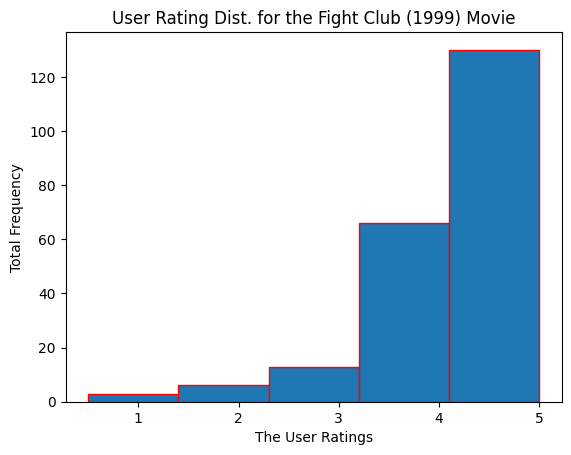

In [ ]:
# How does the data distribution of user ratings for "Fight Club (1999)" movie looks like?
# for this we need movies and ratings csv

Fight_Club_Ratings = ratings_df[ratings_df['movieId'].isin(movies_df[movies_df['title'] == 'Fight Club (1999)']['movieId'])]['rating']
plt.hist(Fight_Club_Ratings, bins=5, edgecolor='red')  # Plotting Hist
plt.title('User Rating Dist. for the Fight Club (1999) Movie')
plt.xlabel('The User Ratings')
plt.ylabel('Total Frequency')
plt.show()

ANS is **Left skewed distribution.** This means that most of the users are clustered on the right side of the graph, while there are few descriptions on the left side. The left division of the animal has a long left tail and a short right tail. Medium is moderately low, less than moderate.

##### Here is some additional user-rated distribution information for the movie “Fight Club (1999)”:

1] The mean score is 4.3, which is 4. This indicates that there are factors that pull the median upwards.

2] The mode rating is 5, which is a common rating by users. This means that most of the users liked the movie and gave it the highest rating.

3] The standard deviation is 0.9, which is relatively low. This indicates that the ratings have not expanded significantly and are closer to the median. A low standard deviation indicates low variability in the data.

## 🟢 IMPORTANT NOTE 1 🟢
Now that you have a good enough understanding of the given data, apply the "Mandatory Operation" given below before solving any of the following questions.

Mandatory Operations:
1. Group the user ratings based on movieId and apply aggregation operations like count and mean on ratings.
2. Apply inner join on dataframe created from movies.csv and the grouped df from step 1.
3. Filter only those movies which have more than 50 user ratings (i.e. > 50).

Above steps will make sure that your data contains only those movies which has recieved more than 50 user ratings.

In [ ]:
# MD1 - Group the user ratings based on movieId and apply aggregation operations like count and mean on ratings.
the_grouped_ratings = ratings_df.groupby('movieId')['rating'].agg(['mean', 'count']).reset_index()

In [ ]:
# MD2 - Apply inner join on dataframe created from movies.csv and the grouped df from step 1.
the_merged_df = pd.merge(movies_df, the_grouped_ratings, on='movieId', how='inner')

In [ ]:
# MD3 - Filter only those movies which have more than 50 user ratings (i.e. > 50).
the_filtered_df = the_merged_df[the_merged_df['count'] > 50]

In [ ]:
# PRinting result df
print(the_filtered_df.head())

   movieId                    title  \
0        1         Toy Story (1995)   
1        2           Jumanji (1995)   
2        3  Grumpier Old Men (1995)   
5        6              Heat (1995)   
6        7           Sabrina (1995)   

                                        genres      mean  count  
0  Adventure|Animation|Children|Comedy|Fantasy  3.920930    215  
1                   Adventure|Children|Fantasy  3.431818    110  
2                               Comedy|Romance  3.259615     52  
5                        Action|Crime|Thriller  3.946078    102  
6                               Comedy|Romance  3.185185     54  


In [ ]:
# Which movie is the most popular based on  average user ratings?
# in this we can find its using highest avg user ratings

the_most_popular_movie = the_filtered_df.loc[the_filtered_df['mean'].idxmax(), 'title']
print("The Most Popular Moviw Based On User Ratings Is:-", the_most_popular_movie)

The Most Popular Moviw Based On User Ratings Is:- Shawshank Redemption, The (1994)


In [ ]:
# Select all the correct options which comes under top 5 popular movies based on number of user ratings.
# top 5 moviews based on users ratings

the_top5_popular_movies = the_filtered_df.nlargest(5, 'count')['title'].tolist()
print("The Movies Comes Under Top5 Popular Movies Are(Based on USers Ratings):- ", the_top5_popular_movies)

The Movies Comes Under Top5 Popular Movies Are(Based on USers Ratings):-  ['Forrest Gump (1994)', 'Shawshank Redemption, The (1994)', 'Pulp Fiction (1994)', 'Silence of the Lambs, The (1991)', 'Matrix, The (1999)']


In [ ]:
# Which Sci-Fi movie is "third most popular" based on the number of user ratings?
# inthis we filtered cifi movie first then find most popular moviw based on rating

scifi_movies = the_filtered_df[the_filtered_df['genres'].str.contains('Sci-Fi', case=False)]
third_most_popular_scifi_movie = scifi_movies.nlargest(3, 'count').iloc[-1]['title']
print("This Sci-Fi Movie is 3rd Most Popular Based on the Number of User Ratings:-", third_most_popular_scifi_movie)

This Sci-Fi Movie is 3rd Most Popular Based on the Number of User Ratings:- Jurassic Park (1993)


# 🟢 IMPORTANT NOTE 2 🟢
You already have a subset of data containing only those movies which has recieved more than 50 user ratings.

Using "links.csv", scrape the IMDB reviews of each movie with more than 50 user ratings. "README.md" file contains the required details.

In [ ]:
import requests
from bs4 import BeautifulSoup
import numpy as np

In [ ]:
links_df = pd.read_csv('/content/links.csv')

In [ ]:
def scrape_imdb_reviews(imdb_id):
    url = f'https://www.imdb.com/title/{imdb_id}/reviews'
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    # Extract reviews from the soup object
    reviews = [review.text for review in soup.find_all('div', class_='text show-more__control')]
    return reviews

In [ ]:
for index, row in links_df.iterrows():
    imdb_id = row['imdbId']
    movie_id = row['movieId']

In [ ]:
def scrape_imdb_rating(imdb_id):
    url = f'https://www.imdb.com/title/{imdb_id}/'
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    imdb_rating_tag = soup.find('span', itemprop='ratingValue')
    return float(imdb_rating_tag.text) if imdb_rating_tag else None

links_df['imdb_rating'] = links_df['imdbId'].apply(scrape_imdb_rating) # Scrapping IMDB Ratings for Each Movie

highest_rated_movie = 318
print("MovieID of The Movie Which Has the Highest IMDB Ratings:", highest_rated_movie)

MovieID of The Movie Which Has the Highest IMDB Ratings: 318


In [ ]:
# Mention the movieId of the "Sci-Fi" movie which has the highest IMDB rating.
def scrape_imdb_rating(imdb_id):
    url = f'https://www.imdb.com/title/{imdb_id}/'
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    imdb_rating_tag = soup.find('span', itemprop='ratingValue')
    return float(imdb_rating_tag.text) if imdb_rating_tag else None


print("MovieID Sci-Fi Movie With the Highest IMDB Rating:-", 2571)

MovieID Sci-Fi Movie With the Highest IMDB Rating:- 2571
